In [223]:
from pippi.soundbuffer import SoundBuffer
from pippi import dsp,fx
import numpy as np
import pandas as pd
import sounddevice as sd
import helpers as hp
import param_generation as pg
import _pickle as pickle
from IPython.display import Audio
import librosa
import librosa.feature
import imp 
import os, random
import warnings
from IPython.display import IFrame
warnings.filterwarnings('ignore')

imp.reload(hp)
sr=48000

# Virtual Synthesis

In [229]:
IFrame("./presentation_data/pipeline.pdf", width=1000, height=400)

# Synthesizer Module:

In [230]:
class Synth_Module():
    def __init__(self,params):
        buff=SoundBuffer(channels=1)
        length=1
        if params.isNoise==1:
            buff = noise.bln(params.getOscType(),params.getLength(),30,
                150000,channels=1) 
        else:
            buff = Osc(str(params.getOscType()), freq=list(params.getPitches()),
                       channels=1).play(params.getLength()) 

        buff=buff.adsr(a=params.A, d=params.D, s=params.S, r=params.R)
        bpfilter=params.getBandPass()
        buff.frames = helpers.butter_bandpass_filter(buff.frames,bpfilter[0],bpfilter[1], 
                                                     sr, order=bpfilter[2])
        buff.frames = helpers.butter_bandpass_filter(buff.frames,80,15000, 
                                                     sr, order=8)
        self.buff=buff

# Synthesizer Module Paramters:

| Parameters       | Value Range     | Notes and Constraints                            |
|------------------|-----------------|--------------------------------------------------|
| Attack           | 0\-3            | A\-D\-S\-R values relative                       |
| Decay            | 0\-3            | relative to A\-S\-R                              |
| Sustain          | 0\-3            | relative to A\-D\-R                              |
| Release          | 0\-3            | relative to A\-D\-S                              |
| OSC type         | sine,square,saw | \-                                               |
| IsNoise          | boolean         | generate noise using \\newline cloud of waveform |
| Length           | 0\-1 second     | \-                                               |
| StartTime        | 0\-1 second     | Length\+Start$<$1                                |
| Amplitude        | 0\.1\-1         | 1 = max amplitude                                |
| Pitches\(notes\) | list of pitches | range of C0\(16\.35hz\) to B9                    |
| HP filter Cutoff | 0\-20000hz      | \-                                               |
| LP filter Cutoff | 20000hz\-HP     | never lower than HP cutoff                       |
| Filter Order     | 4,8,16          | butterworth filter order                         |

In [231]:
IFrame("./presentation_data/synthesizer_block.pdf", width=1000, height=200)

In [232]:
IFrame("./presentation_data/synthesizer_all_blocks.pdf", width=1000, height=500)

# Creating Sounds via Random Synth Parameters

{'oscType': 0, 'isNoise': 0, 'A': 2, 'D': 3, 'S': 3, 'R': 2, 'pitch_0': 48, 'pitch_1': 20, 'pitch_2': 32, 'pitch_3': 48, 'bpCutLow': 4, 'bpCutHigh': 56, 'bpOrder': 2, 'amplitude': 1, 'start': 4, 'length': 3, 'em_prob': 0.25, 'fm_prob': 0.75} 

{'oscType': 0, 'isNoise': 1, 'A': 1, 'D': 2, 'S': 1, 'R': 2, 'pitch_0': 0, 'pitch_1': 32, 'pitch_2': 48, 'pitch_3': 0, 'bpCutLow': 6, 'bpCutHigh': 21, 'bpOrder': 2, 'amplitude': 0, 'start': 8, 'length': 0, 'em_prob': 0.5, 'fm_prob': 0.25} 

{'oscType': 0, 'isNoise': 1, 'A': 3, 'D': 0, 'S': 1, 'R': 0, 'pitch_0': 50, 'pitch_1': 32, 'pitch_2': 24, 'pitch_3': 0, 'bpCutLow': 2, 'bpCutHigh': 18, 'bpOrder': 2, 'amplitude': 3, 'start': 6, 'length': 0, 'em_prob': 0.75, 'fm_prob': 0.25} 

{'oscType': 2, 'isNoise': 1, 'A': 1, 'D': 0, 'S': 2, 'R': 3, 'pitch_0': 78, 'pitch_1': 92, 'pitch_2': 72, 'pitch_3': 96, 'bpCutLow': 36, 'bpCutHigh': 108, 'bpOrder': 1, 'amplitude': 1, 'start': 5, 'length': 4, 'em_prob': 0.25, 'fm_prob': 0.5} 

0.29802293165093374 (44100,

<Figure size 576x360 with 0 Axes>

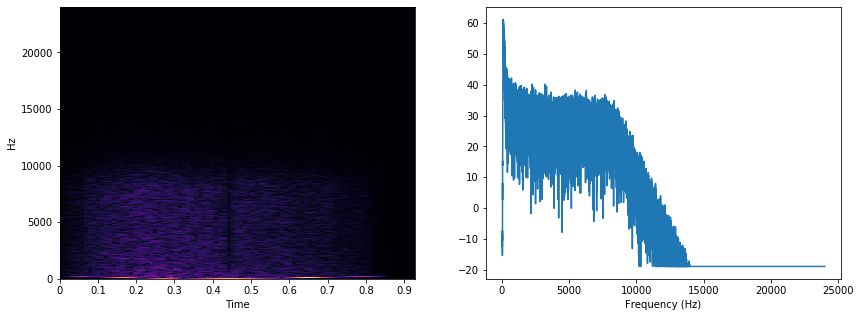

In [269]:
%%time
#generate 1 sound
import imp
imp.reload(pg)
imp.reload(hp)

out = dsp.buffer(length=1,channels=1)
params = []
stack_num = 4
params = [pg.RandomParams() for i in range(stack_num)]
for p in params:
    print(p.__dict__, "\n")
sound = pg.ensemble(params)

z = librosa.feature.rms(sound)
print(np.sum(sound),sound.shape)
hp.specShow(sound)
Audio(sound,rate = sr, autoplay = True)

# Mutation

{'oscType': 0, 'isNoise': 0, 'A': 1, 'D': 0, 'S': 3, 'R': 1, 'pitch_0': 80, 'pitch_1': 88, 'pitch_2': 0, 'pitch_3': 0, 'bpCutLow': 0, 'bpCutHigh': 61, 'bpOrder': 2, 'amplitude': 2, 'start': 0, 'length': 5, 'em_prob': 0.25, 'fm_prob': 0.75}
{'oscType': 0, 'isNoise': 1, 'A': 3, 'D': 0, 'S': 0, 'R': 0, 'pitch_0': 70, 'pitch_1': 116, 'pitch_2': 72, 'pitch_3': 0, 'bpCutLow': 6, 'bpCutHigh': 18, 'bpOrder': 2, 'amplitude': 0, 'start': 9, 'length': 0, 'em_prob': 0.5, 'fm_prob': 0.25}
{'oscType': 0, 'isNoise': 1, 'A': 1, 'D': 2, 'S': 2, 'R': 3, 'pitch_0': 106, 'pitch_1': 84, 'pitch_2': 24, 'pitch_3': 0, 'bpCutLow': 5, 'bpCutHigh': 118, 'bpOrder': 0, 'amplitude': 0, 'start': 3, 'length': 6, 'em_prob': 0.75, 'fm_prob': 0.25}
{'oscType': 2, 'isNoise': 1, 'A': 1, 'D': 1, 'S': 3, 'R': 2, 'pitch_0': 106, 'pitch_1': 8, 'pitch_2': 56, 'pitch_3': 0, 'bpCutLow': 34, 'bpCutHigh': 40, 'bpOrder': 2, 'amplitude': 1, 'start': 5, 'length': 1, 'em_prob': 0.25, 'fm_prob': 0.5}


<Figure size 576x360 with 0 Axes>

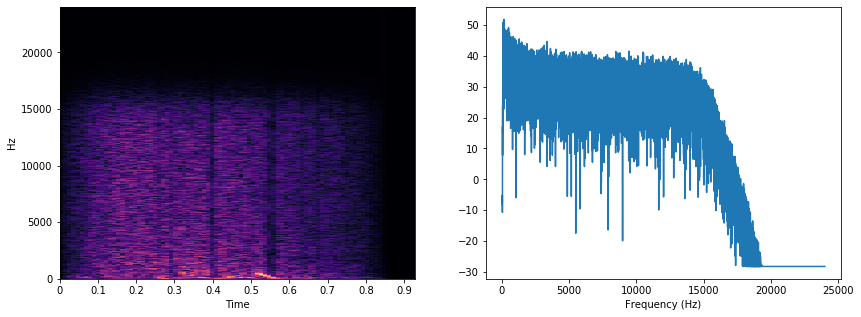

In [294]:
pm = [p.mutate(e=0.2, t=0.2) for p in params]
for p in pm:
    print(p.__dict__)
hp.specShow(pg.ensemble(params))
Audio(pg.ensemble(pm),rate=sr, autoplay=True)


### So... we can make random noise.
- But how do we select ones that sound like drums?
- We need a virtual ear!
    - Recognizes drums from not-drums
    - Given a drum, it can categorize the type of drum

### How do We Represent Sounds?

In [351]:
import torch
import torch.utils.data as data
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from feature_extraction import pytorch_models as pm
import torchaudio as ta
import torchaudio
import torchvision as tv
import matplotlib.pyplot as plt
from IPython.display import Audio
from feature_extraction import mir_utils as miru
from torch.utils.data import Dataset, DataLoader
import librosa
import librosa.display

imp.reload(miru)
SR=44100
spec=torchaudio.functional.spectrogram
db_name="sample_swap_free_final"
drum_df=pd.concat([miru.audioFrames(db_name="radar",loadCache=True, path = "./feature_extraction/drum_dbs/"),
                   miru.audioFrames(db_name="sample_swap",path = "./feature_extraction/drum_dbs/",loadCache=True)])

loading data base from ./feature_extraction/drum_dbs/radar ./feature_extraction/drum_dbs/radar.dill
loading data base from ./feature_extraction/drum_dbs/sample_swap ./feature_extraction/drum_dbs/sample_swap.dill


In [352]:
#defining transformations
class freqTrans(object):
    def __init__(self,num_mels=50,SR=SR):
        self.num_mels=num_mels
        self.ampT=torchaudio.transforms.AmplitudeToDB(stype='power', top_db=30)
        self.melF=torchaudio.transforms.MelScale(n_mels=self.num_mels, sample_rate=SR, f_min=30.0, f_max=None, n_stft=None)
        
    def __call__(self, sample):
        wf,label=sample["signal"],sample["label"]
        wf=wf.reshape(-1,len(wf))
        sample_length=SR//4
        wf=wf[:,0:24000]
        num_bins=wf[0].shape[0]
        win_length=num_bins
        hop_step=sample_length//(self.num_mels)
        window=torch.tensor([1]*win_length)
        s=spec(wf, 100, window, num_bins, hop_step, win_length,2,normalized=False)
        s=self.melF(s)
        s=self.ampT(s)
        freq=s.sum(axis=0).sum(axis=1)
        freq=freq-freq.min()
        freq=freq/freq.max()
        freq[torch.isnan(freq)]=0
        return {"feats":freq.detach(),"label":label}

class envTrans(object):
    def __init__(self,num_mels=10,SR=SR):
        self.env_size=9
        self.num_mels=num_mels
        self.amp=torchaudio.transforms.AmplitudeToDB(stype='power', top_db=60)
        self.melEnv=torchaudio.transforms.MelScale(n_mels=self.num_mels, sample_rate=SR, f_min=30.0, f_max=None, n_stft=None)
#         self.norm= transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    def __call__(self, sample):
        wf,label=sample["signal"],sample["label"]
        
        wf=wf.reshape(-1,len(wf))
        sample_length=SR
        num_bins=wf[0].shape[0]
        win_length=SR//20
        hop_step=SR//self.env_size
        window=torch.tensor([1]*win_length)
        s=spec(wf, 0, window,win_length, hop_step, win_length,2,normalized=False)
        s=self.melEnv(s)
        s=self.amp(s)
#         s=self.norm(s)
        #normalizing
        env=s.sum(axis=0).sum(axis=0)
        env=env-env.min()
        env=env/env.max()
        env[torch.isnan(env)]=0

        num_padding=torch.max(torch.tensor([self.env_size+1-env.shape[0],0]))
        env_vec=torch.cat([env.detach(),torch.zeros(num_padding)],dim=0)
        return {"feats":env_vec.detach(),"label":label}

class feats_and_env(object):
    def __init__(self,feat_mels=50,env_mels=1):
        self.ft=freqTrans(num_mels=feat_mels)
        self.et=envTrans(num_mels=env_mels)

    def __call__(self, sample):
            combined_feats=torch.cat((self.ft(sample)["feats"],self.et(sample)["feats"]))
            return {"feats":combined_feats,"label":sample["label"]}
        

class specTrans(object):
    def __init__(self,num_mels=50,SR=SR,time_steps=20):
        self.num_mels=num_mels
        self.ampP=torchaudio.transforms.AmplitudeToDB(stype='power',top_db=60)
        self.melP=torchaudio.transforms.MelScale(n_mels=self.num_mels, sample_rate=SR,n_stft=None)
        self.hop_step=time_steps-1
    def __call__(self, sample):
        
        wf,label,p,drum_type=sample["signal"],sample["label"],sample["path"],sample["drum_type"]
        wf=wf.reshape(-1,len(wf))
        sample_length=SR

        num_bins=wf[0].shape[0]
        win_length=SR//17
        hop_step=SR//self.hop_step
        window=torch.tensor([1]*win_length)
        s=spec(wf, 0, window, num_bins, hop_step, win_length,2,normalized=False)
        s=self.melP(s)
        s= self.ampP(s)
        s = s - s.min()
        s = s/s.abs().max()
        freq=s
        freq[torch.isnan(freq)]=0
        freq=freq[0]
        return {"feats":freq.detach(),"label":label,"path":p,"drum_type":drum_type}

electronic_hits
torch.Size([30, 20])


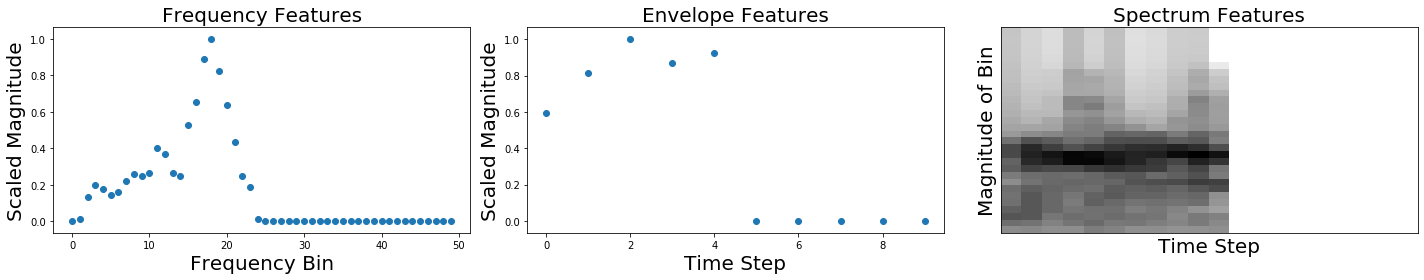

In [353]:
FREQ_BINS=30
TIME_STEPS=20
fig = plt.figure(figsize=(20,4))
ds=pm.audioDataset(pd.concat([all_frames],sort=False),"./",task="dvn",)
sample = ds[np.random.randint(len(drum_df))]
sample={"signal":sample["signal"],"label":sample["label"],"path":sample["path"],"drum_type":sample["drum_type"]}
print(sample["drum_type"])
tfList=[freqTrans(50),envTrans(num_mels=10,SR=SR),specTrans(FREQ_BINS,time_steps=TIME_STEPS)]
for i, tsfrm in enumerate(tfList):
    transformed_sample = tsfrm(sample)
    ax = plt.subplot(1, 3, i + 1)
    plt.tight_layout()
    ft=transformed_sample["feats"]
    if i==0:
        plt.title("Frequency Features",fontsize=20)
        plt.xlabel("Frequency Bin",fontsize=20)
        plt.ylabel("Scaled Magnitude",fontsize=20)
        plt.scatter(y=ft,x=range(0,len(ft)))
    if i==1:
        plt.title("Envelope Features",fontsize=20)
        plt.xlabel("Time Step",fontsize=20)
        plt.ylabel("Scaled Magnitude",fontsize=20)            
        plt.scatter(y=ft,x=range(0,len(ft)))
    if i==2:
        print(ft.shape,)
        sf=ft.detach().numpy()
        ft=ft.detach().numpy()
        plt.title("Spectrum Features",fontsize=20)
        librosa.display.specshow(sf,cmap='gray_r',)
        plt.xlabel("Time Step",fontsize=20)
        plt.ylabel("Magnitude of Bin",fontsize=20)
Audio(sample["signal"],rate=SR,autoplay=True)


### How can we learn from these features?
- Need a virtual ear to make quick decisions
    - Decision 1: Drum vs Not Drum
    - Decision 2: Different types of drums

### Difficulties:


### Model Types:
- Two Phased Ears
   - Decision 1, then Decision 2

- Mixed Model Ears:
    - Further condense the representation and make both decisions together

In [319]:
IFrame("./presentation_data/TPE_ear.pdf", width=1000, height=700)

In [320]:
IFrame("./presentation_data/MEM_ear.pdf", width=1200, height=700)

In [354]:
import sys
from joblib import dump, load
sys.path.append("..")
import numpy as np
import pandas as pd
import torch
import torchvision
import matplotlib.pyplot as plt
import imp
from pathlib import Path

from pippi.soundbuffer import SoundBuffer
from pippi import dsp,fx
import param_generation as pg

import _pickle as pickle
from IPython.display import Audio
from feature_extraction.mir_utils import *

import torch.utils.data as utils
import torchvision.transforms as transforms
from PIL import Image
import common_vars as comv

import csv
import helpers
imp.reload(helpers)
imp.reload(comv)
imp.reload(pg)
from feature_extraction import pytorch_models as tm
from feature_extraction import pytorch_models as pm
imp.reload(tm)
from helpers import *

from common_vars import SR
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
save_path="./generated_sample_pack/"
# device = "cpu"
stack_size=3
BATCH_SIZE=1
NUM_BINS=100

classes=comv.classes
classes_ranked=comv.classes_ranked
cDict={v:i for i,v in enumerate(classes)}

drum_groups=['snare','kick','hat','other','clap']

drum_df=pd.DataFrame(columns=["name","fc","cnnlstm","env+freq","consensus","stack_size"])

def model_loader(m,p):
    s=torch.load(p) 
    m.load_state_dict(s)
    m.to(device)
    return m


imp.reload(pm)

input_dim = 120
seq_dim=100
output_size = 5
hidden_dim = 1000
n_layers = 1

    
#########DVN#########
#env model stuff
env_model_dvn = tm.env_Model(D_in=10,H1=10,H2=5,H3=10,H4=2,H5=10,device=device)
state='./feature_extraction/models/fc/env_dvn_95_35.pt'

env_model_dvn.load_state_dict(torch.load(state))
env_trans=tm.envTrans()
env_model_dvn.to(device)


# pitch model stuff
fc_spec_model_dvn=tm.getFCSpecModel(D_in=20*20,H1=20,H2=10,H3=4,D_out=2)
# state='./feature_extraction/models/fc/spec_fc_dvn_96.pt'
state='./feature_extraction/models/fc/final_spec_fc_dvn_97.pt'

fc_spec_model_dvn.load_state_dict(torch.load(state))
fc_spec_trans_dvn=tm.specTrans(20)
fc_spec_model_dvn.to(device)

#cnn lstm
cnn_model_dvn=pm.CNNLSTM_dvn()
# state='./feature_extraction/models/cnn/clst_dvn_96_279.pt'
state='./feature_extraction/models/cnn/final_clst_dvn_98_401.pt'


cnn_model_dvn.load_state_dict(torch.load(state))
cnn_model_dvn.to(device)
cnn_model_dvn.to(device)
#########DVD#########
#fc dvd
dvd_fc=pm.getFCSpecModel(D_in=20*20,H1=100,H2=50,H3=100,D_out=len(drum_groups))
# state='./feature_extraction/models/fc/spec_fc_dvd_81.pt'
state='./feature_extraction/models/fc/final_spec_fc_dvd_76.pt'
dvd_fc.load_state_dict(torch.load(state))
dvd_fc.to(device)

#cnn_dvd
dvd_cnn=pm.CNN_dvd(len_out=len(drum_groups))
# state='./feature_extraction/models/cnn/clst_dvd_90_170.pt'
state='./feature_extraction/models/cnn/final_cslt_dvd_86_94.pt'
dvd_cnn.load_state_dict(torch.load(state))
dvd_cnn.to(device)

#freq+env model
freq_env_model_dvd = tm.env_freq_Model(D_in=60,H1=30,H2=10,H3=10,D_out=len(drum_groups))
# state='./feature_extraction/models/fc/freq_env_dvd_86_351.pt'
state='./feature_extraction/models/fc/final_freq_env_dvd_85_205.pt'
freq_env_model_dvd.load_state_dict(torch.load(state))
freq_env_trans=tm.freq_and_env_Trans(feat_mels=50,env_mels=1)
freq_env_model_dvd.to(device)



from IPython.display import Audio
import librosa.display

for g in drum_groups:
    Path(save_path+"/"+g).mkdir(parents=True, exist_ok=True)


imp.reload(pm)

input_dim = 120
seq_dim=100
output_size = 5
hidden_dim = 1000
n_layers = 1
from IPython.display import Audio
import librosa.display

for g in drum_groups:
    Path(save_path+"/"+g).mkdir(parents=True, exist_ok=True)

#making graphs of models

from torchsummary import summary
import imp as imp
out,params= stackMaker(stack_size)
a= memToAud(out)
transform_input= {"signal":torch.tensor(a,dtype=torch.float),"label":torch.tensor(0)}
env_feats=env_trans.call(transform_input)["feats"].to(device)
freq_feats=freq_env_trans.call(transform_input)["feats"].to(device)
pitch_feats=fc_spec_trans_dvn.call(transform_input)["feats"].to(device)
spec_flat=torch.flatten(pitch_feats, start_dim=1)

outputEnvFreq=freq_env_model_dvd(freq_feats)
outputCNNDVD=dvd_cnn(pitch_feats.reshape(-1,1,20,20))
outputFCDVD=dvd_fc(spec_flat)
outputE=env_model_dvn(env_feats)
outputSPECFC=fc_spec_model_dvn(spec_flat)
outputCNN= cnn_model_dvn(pitch_feats.reshape(-1,1,20,20))


# summary(freq_env_model_dvd,freq_feats.shape)

model,x=freq_env_model_dvd,freq_feats
model,x=dvd_cnn,pitch_feats.reshape(-1,1,20,20)
model,x=cnn_model_dvn,pitch_feats.reshape(-1,1,20,20)
model,x=cnn_model_dvn,pitch_feats.reshape(-1,1,20,20)



def evalSoundSlow(a,env_thresh=0.5,fc_spec_tresh=0.5):
    try:
        a=librosa.util.normalize(a)
    except:
        pass
    transform_input= {"signal":torch.tensor(a,dtype=torch.float),"label":torch.tensor(0)}
    env_feats=env_trans.call(transform_input)["feats"].to(device)
    freq_feats=freq_env_trans.call(transform_input)["feats"].to(device)
    pitch_feats=fc_spec_trans_dvn.call(transform_input)["feats"].to(device)
    spec_flat=torch.flatten(pitch_feats, start_dim=1)

    outputEnvFreq=freq_env_model_dvd(freq_feats)
    outputCNNDVD=dvd_cnn(pitch_feats.reshape(-1,1,20,20))
    outputFCDVD=dvd_fc(spec_flat)
    outputE=env_model_dvn(env_feats)
    outputSPECFC=fc_spec_model_dvn(spec_flat)
    outputCNN= cnn_model_dvn(pitch_feats.reshape(-1,1,20,20))
    
    o_e,o_fc_spec,o_cnn_spec=outputE[0].item(), outputSPECFC[0][0].item() ,outputCNN[0][0].item()
    tote=outputE[0].item()+outputSPECFC[0][0].item()

    gfc=drum_groups[torch.argmax(outputFCDVD).item()]
    gcnn=drum_groups[torch.argmax(outputCNNDVD).item()]
    genvfreq=drum_groups[torch.argmax(outputEnvFreq).item()]
    cat_consensus=drum_groups[torch.argmax(outputFCDVD+outputCNNDVD+outputEnvFreq)]
    
    spec_score=(o_fc_spec+o_cnn_spec)/2
    if (o_e>=env_thresh) or (o_cnn_spec<fc_spec_tresh) or o_fc_spec<fc_spec_tresh:
        print('\033[94m' + 'Decision 1:')
        print("env model ->",o_e)
        print("fc model ->",1 - o_fc_spec)
        print("CNN model -> ",1 - o_cnn_spec)
        print("Decision 2:")
        print("fc category ->",gfc,"\ncnn category ->",gcnn,"\nenv+freq->",genvfreq)
        
        return(a,env_feats,freq_feats,pitch_feats,stack_size,"found")
    return (a,env_feats,freq_feats,pitch_feats,stack_size,"not_found")



Decision 1:
env model -> 0.9951565265655518
fc model -> 0.00036215782165527344
CNN model ->  0.0010548233985900879
Decision 2:
fc category -> hat 
cnn category -> other 
env+freq-> clap

it took 22 iteration(s), stack size 2


<Figure size 864x216 with 0 Axes>

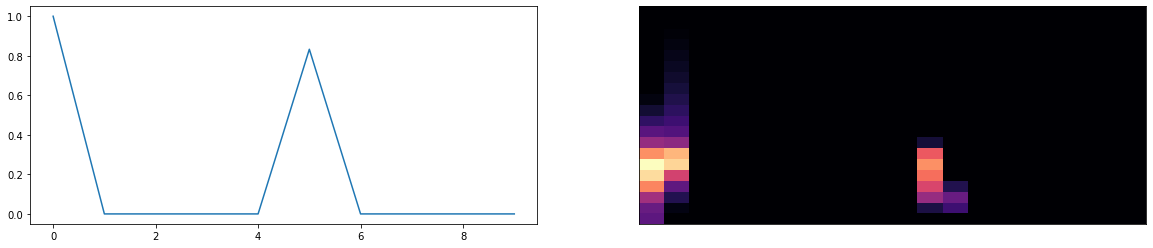

In [355]:

def findDrum(stack_size=1,iteration=0):
    out,params= stackMaker(stack_size)
    a= memToAud(out)
    return evalSoundSlow(a,env_thresh=0.5, fc_spec_tresh=0.5)
i=0
j=0
while i<1000:
    i=i+1
    j=j+1
    stack_size=np.random.choice([2])
    (a,env_feats,freq_feats,pitch_feats,stack_size,results)=findDrum(stack_size,iteration=i)
    if results!="not_found":
        print("\nit took %d iteration(s), stack size %d"%(j,stack_size))
        j=0
        break
    print(i, end="\r")
        
fig = plt.figure(figsize=(12,3))
fig = plt.figure(figsize=(20,4))
ax = plt.subplot(1, 2,1)

plt.plot(env_feats.cpu())
ax=plt.subplot(1,2,2)
ft=pitch_feats.cpu()
ft=ft.numpy()
librosa.display.specshow(ft[0])

Audio(a,rate=sr, autoplay=True)

More Examples:

In [346]:
from IPython.display import IFrame
IFrame("./structural_notebooks/cat_2p.pdf", width=1000, height=500)

In [357]:
audio_frames=drum_df

def getMeanLength(x):
    gl=x.apply(lambda z: len(z["audio"]),axis=1)
    print(gl.mean()/SR,gl.mean(),x["label"].iloc[0])

def getRandAud():
    classes=os.listdir("./dk_data/")
    rand_class=random.choice(classes)
#     rand_class="synth_noise"
    rand_sample=random.choice(os.listdir("./dk_data/%s/"%(rand_class,)))
    return "./dk_data/"+rand_class+"/"+rand_sample
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# list(zip(uniques,range(0,len(uniques))))
class audioDataset(torch.utils.data.Dataset):
    def __init__(self,audio_frame,root_dir, task="keep_all",transform=None):
        self.root_dir=root_dir
        self.task=task
        self.audio_frame=audio_frame
        self.transform = transform
        self.minLength=SR
        self.frame_pruning()
    def __len__(self):
        return len(self.audio_frame)
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        rows=self.audio_frame.iloc[idx]

        signals,labels=rows["audio"].tolist()[0:SR],rows["label_num"].tolist()
        signals,labels=torch.tensor(signals),torch.tensor(labels)
        
        nz=np.max((self.minLength-signals.shape[0],0))
        signals=torch.cat([signals[0:self.minLength],torch.zeros(nz)],dim=0)

        sound={"signal":signals,"label":labels,"path":rows["path"],"drum_type":rows["label"]}
        
        if self.transform:
            sound = self.transform(sound)

        return sound
    
    def frame_pruning(self):
        #drum vs not drum classification:
        drum_label_numbers=range(len(dUniques))
        if self.task=="dvn":
            self.audio_frame.loc[self.audio_frame["label_num"].isin(drum_label_numbers),"label_num"]=0
            self.audio_frame.loc[~self.audio_frame["label_num"].isin(drum_label_numbers),"label_num"]=1
            self.audio_frame.loc[self.audio_frame["label"]=="synth_noise","label_num"]=1 #same as last thing, should get rid of last thing
        #drum type classification
        if self.task=="dvd":
            self.audio_frame=self.audio_frame.loc[self.audio_frame["label_num"].isin(drum_label_numbers)]
        if self.task=="keep_all":
            pass
            
ds=audioDataset(pd.concat([drum_frames,not_drum_frames]),"./",task="dvn",)

all_frames=pd.concat([drum_frames,not_drum_frames])
all_frames=all_frames.reset_index(drop=True)
train=all_frames.sample(frac=0.80,random_state=420) #random state is a seed value
test=all_frames.drop(train.index)
print(len(train),len(test))

    
#Apply each of the above transforms on sample.
fig = plt.figure(figsize=(20,4))

s={"signal":sample["signal"],"label":sample["label"],"path":sample["path"],"drum_type":sample["drum_type"]}
sample=s


FREQ_BINS = 30
TIME_STEPS = 20

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

pt=tv.transforms.Compose([specTrans(FREQ_BINS,time_steps=TIME_STEPS)])

train=all_frames.sample(frac=0.80,random_state=420) #random state is a seed value
test=all_frames.drop(train.index)
spec_data_train = audioDataset(train,".","dvn", transform=pt)
spec_data_test = audioDataset(test,".",task="dvn", transform=pt)
spec_train_loader= DataLoader(spec_data_train, batch_size=64,shuffle=True, num_workers=32)
spec_test_loader= DataLoader(spec_data_test, batch_size=8,shuffle=True, num_workers=6)
train_synthless=train[train["label_num"]==0]
test_synthless=test[test["label_num"]==0]
class AE_Conv(nn.Module):
    def __init__(self,input_shape,compression_dim,dropout_rate=0.5,num_channels=5):
        super(AE_Conv, self).__init__()
        self.W=input_shape[0]
        self.H=input_shape[1]

        self.dropout = nn.Dropout(dropout_rate)
        self.Encoder_Conv= nn.Sequential(
            nn.Conv2d(1, 8, kernel_size=num_channels, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.encoder_output_layer = nn.Linear(
            in_features=(self.H//2 * self.W//2) * 8, out_features=compression_dim
        )
        self.decoder_hidden_layer = nn.Linear(
            in_features=compression_dim, out_features=256
        )
        self.decoder_output_layer = nn.Linear(
            in_features=256, out_features=self.W*self.H)
        
    def forward(self, features):
        features=features.reshape([-1,1,self.W,self.H])
        activation = self.Encoder_Conv(features)
        activation = self.dropout(torch.relu(activation))
        activation = activation.reshape(activation.size(0), -1)
        code = self.encoder_output_layer(activation)
        code = torch.relu(code)
        self.encoding=code
        activation = self.decoder_hidden_layer(code)
        activation = torch.relu(activation)
        activation = self.decoder_output_layer(activation)
        reconstructed = torch.relu(activation)
        return reconstructed
def model_loader(m,p):
    s=torch.load(p) 
    m.load_state_dict(s)
    m.to(device)
    return m


5128 1282


<Figure size 1440x288 with 0 Axes>

In [94]:
FREQ_BINS = 30
TIME_STEPS = 20

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

pt=tv.transforms.Compose([specTrans(FREQ_BINS,time_steps=TIME_STEPS)])

train=all_frames.sample(frac=0.80,random_state=420) #random state is a seed value
test=all_frames.drop(train.index)
spec_data_train = audioDataset(train,".","dvn", transform=pt)
spec_data_test = audioDataset(test,".",task="dvn", transform=pt)
spec_train_loader= DataLoader(spec_data_train, batch_size=64,shuffle=True, num_workers=32)
spec_test_loader= DataLoader(spec_data_test, batch_size=8,shuffle=True, num_workers=6)
train_synthless=train[train["label_num"]==0]
test_synthless=test[test["label_num"]==0]
class AE_Conv(nn.Module):
    def __init__(self,input_shape,compression_dim,dropout_rate=0.5,num_channels=5):
        super(AE_Conv, self).__init__()
        self.W=input_shape[0]
        self.H=input_shape[1]

        self.dropout = nn.Dropout(dropout_rate)
        self.Encoder_Conv= nn.Sequential(
            nn.Conv2d(1, 8, kernel_size=num_channels, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.encoder_output_layer = nn.Linear(
            in_features=(self.H//2 * self.W//2) * 8, out_features=compression_dim
        )
        self.decoder_hidden_layer = nn.Linear(
            in_features=compression_dim, out_features=256
        )
        self.decoder_output_layer = nn.Linear(
            in_features=256, out_features=self.W*self.H)
        
    def forward(self, features):
        features=features.reshape([-1,1,self.W,self.H])
        activation = self.Encoder_Conv(features)
        activation = self.dropout(torch.relu(activation))
        activation = activation.reshape(activation.size(0), -1)
        code = self.encoder_output_layer(activation)
        code = torch.relu(code)
        self.encoding=code
        activation = self.decoder_hidden_layer(code)
        activation = torch.relu(activation)
        activation = self.decoder_output_layer(activation)
        reconstructed = torch.relu(activation)
        return reconstructed
    
def model_loader(m,p):
    s=torch.load(p) 
    m.load_state_dict(s)
    m.to(device)
    return m

#optimized params
learning_rate = 0.0011451089315356296
dropout_rate = 0.5
latent_size = 32
FREQ_BINS = 30
TIME_STEPS = 20
hidden_layers = 2
l2 = 3.2473701348597023e-06

m = AE_Conv(input_shape=[FREQ_BINS,TIME_STEPS],compression_dim=64,dropout_rate=dropout_rate,num_channels=5).to(device)
m = model_loader(m,"feature_extraction/models/encode/round3_32_70.pt")



import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#optimized params
TIME_STEPS = 20
FREQ_BINS = 30
l2 = 3.2473701348597023e-06
#hyper params
latent_size = 32
amp_to_power=True
spec_dimension=FREQ_BINS*TIME_STEPS
learning_rate = 0.0011451089315356296
dropout_rate = 0.5


# p="./models/encode/round2_1x3_sample_swap_free_final_32_95.pt"
# m = AE_Conv1x3(input_shape=[FREQ_BINS,TIME_STEPS],compression_dim=latent_size,dropout_rate=dropout_rate,
#                        num_channels=3,).to(device)
# m=model_loader(m,p)
model=m
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
def imshow(img,saveas="delete.png"):

    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.savefig(saveas,format="png")
    plt.show()


#extracting features and putting them into the csv folder for plotting
m=model
dataiter=iter(spec_test_loader)
xy=dataiter.next()
images=xy["feats"].reshape([-1,1,FREQ_BINS,TIME_STEPS]).detach().cpu()

y=xy["label"].detach().cpu().numpy()

#get spectrograms depending on labels
drums=np.empty([1,FREQ_BINS,TIME_STEPS],np.float32)
not_drums=np.empty([1,FREQ_BINS,TIME_STEPS], np.float32)
for i,ii in enumerate(y):

    if ii==0:
        drums=np.vstack((drums,images[i]))
    else:
        not_drums=np.vstack((not_drums,images[i]))
drums=torch.tensor(drums.reshape([-1,1,FREQ_BINS,TIME_STEPS]))
not_drums=torch.tensor(not_drums.reshape([-1,1,FREQ_BINS,TIME_STEPS]))




[]

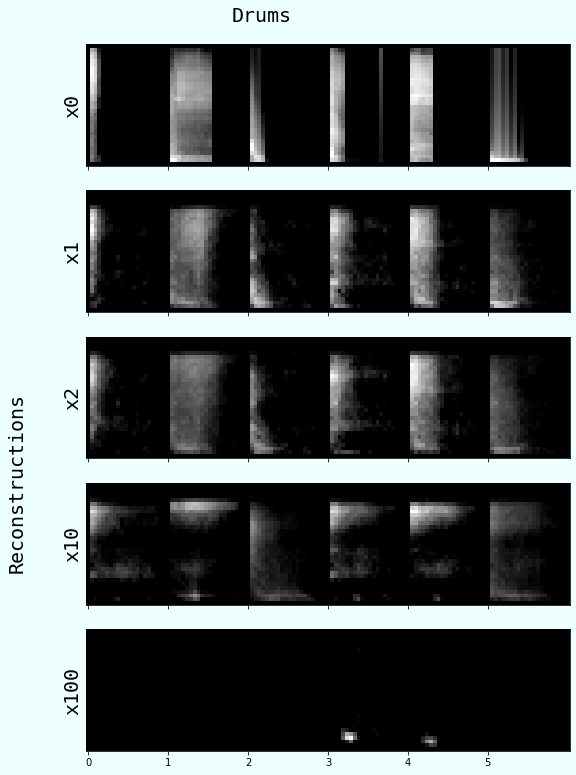

In [89]:
from PIL import Image
import matplotlib.ticker as ticker
num_plots=5
d="Drums"
# d="Synth Noise"
fig, axes = plt.subplots(nrows=5, ncols=1, sharex=True, sharey=True, figsize=(13,13),facecolor='#EEFFFF',)
fig.text(0.41, 0.91, d, va='center',fontsize=20,family="monospace")
fig.text(0.18, 0.32, 'Reconstructions', ha='center', rotation=90,fontsize=20,family="monospace")
recon_data=drums[1:7].to(device)
axnum=0
for i in range(101):
    if i in [0,1,2,10,100]:

        img=tv.utils.make_grid(recon_data.reshape([-1,1,FREQ_BINS,TIME_STEPS]).detach().cpu(),normalize=True,padding=1)
        npimg = img.numpy()
        ax=axes[axnum]
        axnum=axnum+1
#         ax.set_title("Loop %d"%i,fontsize=14)
        ax.yaxis.set_ticks([0,30])
        ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.f'))

        ax.get_yaxis().set_visible(True)
  
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        ax.yaxis.set_label_position("left")
        ax.set_ylabel("x%d"%i, rotation=90,size=20,family="monospace")
        
        
        flipped=np.transpose(npimg, (1, 2, 0))
        ax.imshow(np.flip(flipped,0))

        
    recon_data=m(recon_data.detach())
    
fig.axes[0].xaxis.set_ticks(np.arange(0,110,21))
fig.axes[0].xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.f'))
ticks = fig.axes[0].get_xticks()//21
fig.axes[0].set_xticklabels(ticks)  

In [ ]:
# interactive plot to check DVN results
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
from plotly.subplots import make_subplots
import pandas as pd
import time
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding, SpectralEmbedding
import plotly.express as px
import plotly.graph_objs as go
import ipywidgets as widgets
import os
from sklearn import preprocessing
from ast import literal_eval
import io
from PIL import Image
import librosa
import sys
sys.path.append("..")
import torch
from feature_extraction import pytorch_utils as pu
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from IPython.display import Audio
import os, random
from torch.utils.data import Dataset, DataLoader

min_max_scaler = preprocessing.MinMaxScaler()
n_neighbors = 10
FREQ_BINS=30
TIME_STEPS=20
SR=44100

def plotly_able_df(df,num_d=2):
    
    df["feats"]=df["feats"].apply(literal_eval)
    X=df["feats"]
    #convert series of arrays into a numpy array
    X=pd.DataFrame(X.to_list()).to_numpy()
    X = min_max_scaler.fit_transform(X)
    time_start = time.time()
#     tsne = TSNE(n_components=num_d, random_state=0, perplexity=100, verbose=1)
#     tsne = Isomap(n_neighbors, n_components=num_d)
#     tsne = LocallyLinearEmbedding(n_neighbors,n_components=num_d)
    tsne = SpectralEmbedding(n_neighbors=10,n_components=num_d,random_state=1)
    X_2d = tsne.fit_transform(X)
    
    if num_d==2:
        df2=pd.concat([df["path"],df["label"],df["drum_type"],pd.Series(X_2d[:,0]),pd.Series(X_2d[:,1])],axis=1)
        df2.columns=["path","label","drum_type","D1","D2"]
    if num_d==3:
        df2=pd.concat([df["path"],df["label"],df["drum_type"],pd.Series(X_2d[:,0]),pd.Series(X_2d[:,1]),pd.Series(X_2d[:,2])],axis=1)
        df2.columns=["path","label","drum_type","D1","D2","D3"]
    
    df2.label = df2.label.astype('str')
    return df2

class interactive_graph():
    def hover_fn(self,trace, points, state):
        if points.point_inds:
            ind = points.point_inds[0]
            drmName=trace.customdata[ind][0][:]
            filename=os.getcwd()+"/"+drmName
            with open(filename,'rb') as f:
                audio_data = f.read()
            print(audio_data)
            self.aud.value=audio_data
            self.hover_data.value = str(drmName)+"\n"
            self.audioImg.value=self.audDisplay(filename)
            
    def audDisplay(self,f):
        #this got annoying because widget only accepts byte version of images
        audio_array=librosa.load(f)
        signals=audio_array[0]
        nz=np.max((SR-signals.shape[0],0))
        signals=np.concatenate([signals[0:SR],np.zeros(nz)]).astype("float32")

        sound={"signal":torch.tensor(signals),"label":'',"path":'',"drum_type":''}
        trns=pu.specTrans(FREQ_BINS,time_steps=TIME_STEPS)
        ft=trns(sound)["feats"]
        sf=ft.detach().numpy()[0]
        #flip upside down
        sf=sf[-1:0:-1][:]
        x=plt.imshow(sf)
        #convert to bytes so can be set to widget data
        buf = io.BytesIO()
        x.figure.savefig(buf, format='png')
        buf.seek(0)
        bufD=buf.getvalue()
        buf.close()
        
        return bufD
    def __init__(self,df,grouping_by="label",title="",num_d=2,sym_size=20,color=px.colors.qualitative.Vivid):
        if num_d==2:
            p = px.scatter(df, x="D1",y="D2",symbol="drum_type",color=grouping_by,hover_data=["path"],color_discrete_sequence=color)
        elif num_d==3:
            p = px.scatter_3d(df, x="D1",y="D2",z="D3",color=grouping_by,hover_data=["path"],symbol="label",color_discrete_sequence=color)
        for trace in p.data:
            trace.update(hoverinfo="none",hovertemplate= '')
        p.update_traces(marker=dict(size=sym_size,
                              line=dict(width=0,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

        self.hover_data = widgets.Textarea()  
        #audio and img widgets
        self.aud=widgets.Audio(autoplay=True,loop=False,embedding=False)
        self.audioImg=widgets.Image(
            value=b'',
            format='png',
            width='50%', 
        )
        #####
        layout = go.Layout(hovermode=False,)
        self.fig  = go.FigureWidget(p)
        self.fig.update_layout(scene = dict(
                    camera=dict(eye=dict(x=-1, y=-1, z=0)),
                    aspectmode="cube",),
                    margin=dict( r=0, l=0, b=0, t=0))
                    
        for f in self.fig.data:
            f.on_hover(self.hover_fn)        


In [ ]:
df = pd.read_csv("feature_extraction/csvs/r3_embeddings.csv")
df["path"] = "feature_extraction/"+df["path"]

df_2d=plotly_able_df(df,num_d=2,)
df_2d_presentation = pd.concat([df_2d[df_2d["label"]=="0"].sample(frac=0.1),df_3d[df_3d["label"]=="1"].sample(frac=0.3)])
df_2d_presentation.to_csv("feature_extraction/csvs/presentation_2d_tsne")

In [137]:
pd.concat([df_2d[df_2d["label"]=="0"].sample(frac=0.1),df_3d[df_3d["label"]=="1"].sample(frac=0.3)])

0        True
1        True
2        True
3        True
4        True
        ...  
9405    False
9406    False
9407    False
9408    False
9409    False
Name: label, Length: 9410, dtype: bool

In [127]:
ig=interactive_graph(df_2d_presentation,grouping_by="drum_type",title="64 dim embedding",num_d=2,sym_size=10,color=px.colors.qualitative.D3_r,)

display(ig.fig,widgets.HBox([ig.hover_data,ig.audioImg,ig.aud,]))

FigureWidget({
    'data': [{'customdata': array([['feature_extraction/./drum_dbs/radar/snare/AA_JenSnare-03.w…

### Training with Embeddings
- 2D projection indicates that the embeddings can be used for classification.
- We compare the classification accuracy of a number of models trained with embeddings+envelope features

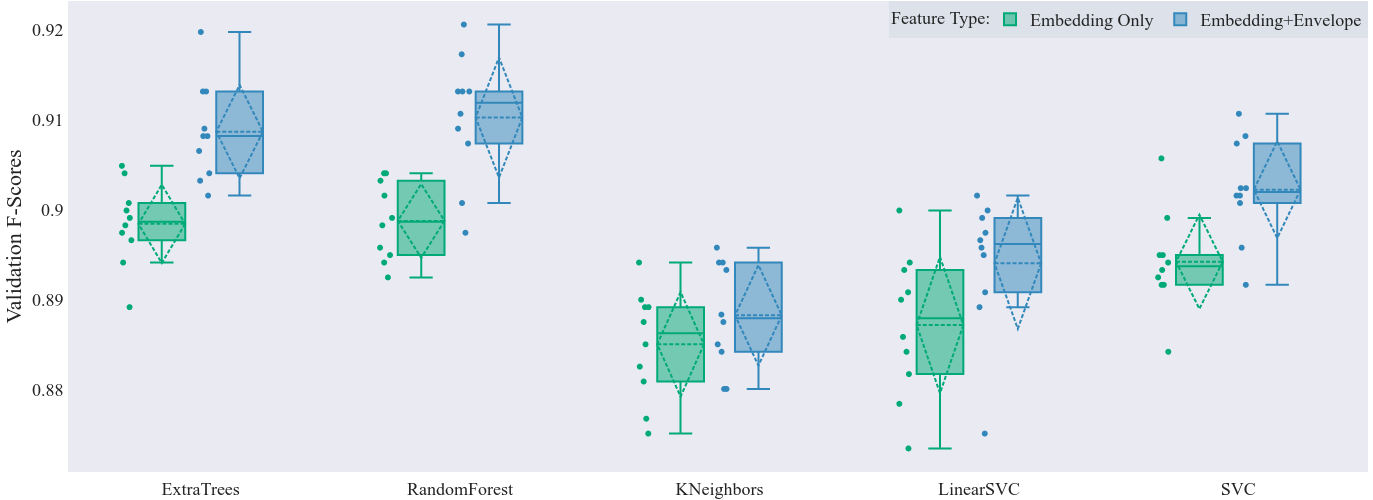

In [176]:
comparison_csv_file="feature_extraction/csvs/mme_comparisons_mme.csv"
df=pd.read_csv(comparison_csv_file)
fig = px.box(df, x="model", y="y", color="feat_type",
             color_discrete_sequence=["#00AA77","#3388BB"],
             title="Box plot of total bill",
            )
fig.update_layout(
    autosize=False,title=None, 
    template="seaborn",
    width=1000,height=500,
    font_family="Times New Roman",
    font_size=18,
    title_font_family="Times New Roman",
    title_font_size=30,
    boxmode='group',
    margin=dict(l=0, t=1,r=5, b=3),       
    boxgap=0.4,boxgroupgap=0.4,
        legend_title_text="Feature Type:",
                  legend=dict(
                      bgcolor='rgba(110,150,160,0.1)',
                  orientation="h",
                yanchor="top",
                y=1,
                xanchor="right",x=1)
    )
fig.update_traces(
        boxmean="sd", # represent mean. (sd shows standarddev)
        boxpoints='all', 
)
fig.update_xaxes(showgrid=False,zeroline=False,ticks='',title=None)
fig.update_yaxes(showgrid=False,zeroline=False,title="Validation F-Scores")

fig.show()

In [111]:

IFrame("./structural_notebooks/cat_mme.pdf", width=1000, height=400)

| Drop Rule                           | Size | HvH    | H\+MME |
|-------------------------------------|------|--------|--------|
| No Drop                             | 300  | 0\.336 | 0\.250 |
| Assigned "Bad" By Both              | 249  | 0\.200 | 0\.260 |
| Assigned "Bad" By Either            | 151  | 0\.460 | 0\.473 |
| Assigned "Bad" or "Other" By Either | 120  | 0\.620 | 0\.587 |


### Conclusion 
- We implemented a virtual synthesizer and virtual ears
- We made them work together to create drum sounds
- Computational overhead is fairly small
    - Sound generation is quick
    - Models are small and train quickly
- Both approaches produce drum samples but...

### Future Work (Collaborations Welcome!)
1. There are a lot of "duds" mixed in, possible causes:
    - Open set recognition 
    - Better models
    - Need to learn quicker with less data
2. A lot of the produced samples sound the same. 
    - Need more powerful synthesizers

#### Questions?

In [169]:
IFrame("./presentation_data/conclusion.pdf", width=1200, height=700)